In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### From Scratch

In [2]:
class LinearRegressionMine():
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train, y_train):
        ''' let's find the best fit line.
            First find out the m & b where the error/loss function will be less
            we know the formula of the finding out m & b which we derived. '''
        
        cgpa_mean_X = X_train.mean()
        cgpa_mean_y = y_train.mean()
        
        '''m_cgpa = ?'''
        
        m_cgpa = 0 # This is nothing but the weight of the cgpa column. Initializing to zero.
        m_cgpa_numerator = 0
        m_cgpa_denominator = 0
        
        for i in range(0,len(X_train)):
            m_cgpa_numerator = m_cgpa_numerator + ((X_train[i]-cgpa_mean_X) * (y_train[i]-cgpa_mean_y))
            m_cgpa_denominator = m_cgpa_denominator + ((X_train[i] - cgpa_mean_X)*(X_train[i] - cgpa_mean_X))
        
        m = m_cgpa_numerator / m_cgpa_denominator
        self.m = m
        
        ''' b = ? '''
        
        b = cgpa_mean_y - (m * cgpa_mean_X)
        self.b = b
        
        print('m',m)
        print('b',b)
        
        
        
    def predict(self,X_test):
        ''' Need to find the equation of the line first to get the result predicted
            y = mx + b'''
        
        return (self.m * X_test) + self.b

In [3]:
df = pd.read_csv('placement_dataset.csv')

In [4]:
df.shape

(200, 2)

In [5]:
df.columns

Index(['cgpa', 'package'], dtype='object')

In [6]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_1583/3596531995.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

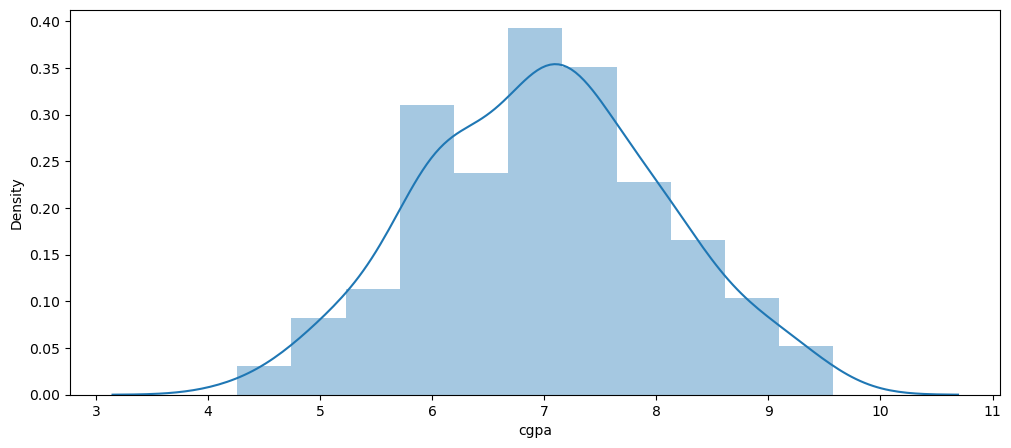

In [7]:
fig = plt.figure(figsize=(12,5))
sns.distplot(df['cgpa'])

+ <b>We can see the cgpa distribution is uniform & looks pretty good from outlier pov

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


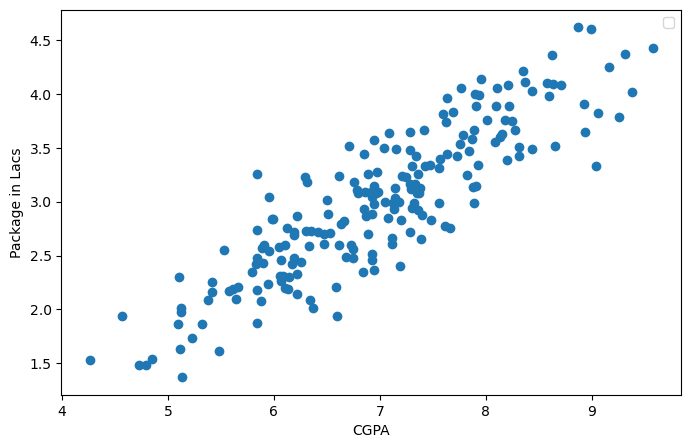

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x=df['cgpa'],y=df['package'])
ax.set(xlabel='CGPA', ylabel='Package in Lacs', label='a')
ax.legend()

#### We can see the data points looks "sort of linear" & that is one of the reason why we are going for SLR(Simple Linear Regression). 

In [9]:
df.sample(6)

,cgpa,package
3,7.42,3.67
139,7.19,2.40
88,4.73,1.48
90,7.11,2.66
151,6.12,2.76
185,6.31,3.18


In [32]:
# import sys
# !{sys.executable} -m pip install pandas-profiling

In [34]:
# import pandas_profiling

In [26]:
# !pip install pandas_profiling

In [11]:
X = df.iloc[:,0]
y = df.iloc[:,1]

In [134]:
# X.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2)

### Creating an instance of a LinearRegressionMine class

In [13]:
lin_reg_custom = LinearRegressionMine()

In [14]:
lin_reg_custom.fit(X_train, y_train)

m 0.5550181034749672
b -0.8813934259952343


In [15]:
y_pred = lin_reg_custom.predict(X_test)

In [16]:
type(y_test)

numpy.ndarray

In [17]:
y_pred_ = pd.Series(y_pred)

In [18]:
y_pred_.head()

0    3.264592
1    2.487566
2    2.926031
3    3.658655
4    3.159138
dtype: float64

In [22]:
X_test

array([7.47, 6.07, 6.86, 8.18, 7.28, 7.08, 8.01, 7.35, 5.11, 7.93, 5.42,
       7.3 , 6.22, 6.93, 6.59, 4.85, 6.71, 7.88, 7.36, 5.23, 5.58, 6.07,
       6.35, 7.94, 8.13, 7.34, 7.21, 7.39, 6.93, 7.73, 6.97, 6.06, 6.26,
       7.28, 8.58, 7.91, 6.93, 6.05, 7.29, 7.04])

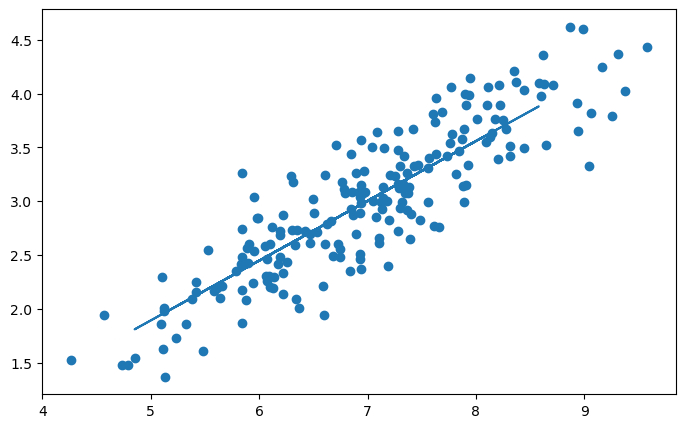

In [25]:
fig = plt.figure(figsize=(18,5))
ax = plt.subplot(1,2,1)
ax.scatter(df['cgpa'],df['package'])
ax.plot(X_test,y_pred)

### Now checking the results with the predefined class of LinearRegression

In [2]:
linreg = LinearRegression()

In [101]:
# np.array(X_train).reshape(-1,1)

In [27]:
linreg.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [28]:
y_pred_linreg = linreg.predict(np.array(X_test).reshape(-1,1))

In [29]:
pd.Series(y_pred_linreg).head()

0    3.264592
1    2.487566
2    2.926031
3    3.658655
4    3.159138
dtype: float64

In [30]:
linreg.coef_

array([0.5550181])

In [31]:
linreg.intercept_

-0.8813934259952374

### Checking for some individual data points

In [32]:
user_input = X_test[0]
user_input.size

1

#### Aditya's Defined Algorithm

In [33]:
lin_reg_custom.predict(user_input)

3.26459180696277

#### pre-defined Logistic Regression Algorithm

In [34]:
linreg.predict([[user_input]])

array([3.26459181])

### Calculating the efficieny of our model through various techniques Like, MAE, MSE, RMSE, R2 Score, Adjusted R2 Score

### One thing to note that when we calculate the values like MAE, MSE, RMSE etc.. the values indicate for output column i.e. target column/feature 

#### MAE - Mean Absolute Error

In [35]:
# print(type(y_pred_linreg))
# print(type(y_test))

total_absolute_value = 0
mean_absolute_error = 0
for i in range(0,len(y_pred_linreg)):
    total_absolute_value = total_absolute_value + np.abs(y_pred_linreg[i] - y_test[i])

mean_absolute_error = total_absolute_value / len(y_pred_linreg)
print('Mean Absolute Error:',mean_absolute_error)

Mean Absolute Error: 0.25027570581079106


+ Robust to outliers - can bear the outliers.
+ Easy to interpret because the error resulted is absolute.

+ Not differentiable at origin. hence, can not be used for loss function while model training

#### MSE - Mean Square Error

In [36]:
total_square_error = 0
mean_square_error = 0

for i in range(0,len(y_pred_linreg)):
    total_square_error = total_square_error + (y_test[i]-y_pred_linreg[i])**2
    
mean_square_error = total_square_error / len(y_pred_linreg)

print('Resulted MSE:',mean_square_error)

print('Bringing down to the original error rate',np.sqrt(mean_square_error))

print(mean_square_error>np.sqrt(mean_square_error))

Resulted MSE: 0.09228574709644025
Bringing down to the original error rate 0.3037856927118857
False


+ Not robust to Outliers - if outliers are there in the data, then this method fails to give us the right efficieny/result of the model.
+ Not easy to interpret as the error is getting squared. So in order to get the original error we have to find the root square of the resulted error value.

+ Differentiable at origin.
+ Can be used for Loss function while model training.

#### Root Mean Square Error

In [37]:
y_pred_linreg

array([3.26459181, 2.48756646, 2.92603076, 3.65865466, 3.15913837,
       3.04813475, 3.56430158, 3.19798963, 1.95474908, 3.51990013,
       2.12680469, 3.17023873, 2.57081918, 2.96488203, 2.77617588,
       1.81044438, 2.84277805, 3.49214923, 3.20353982, 2.02135126,
       2.21560759, 2.48756646, 2.64297153, 3.52545032, 3.63090376,
       3.19243945, 3.1202871 , 3.22019036, 2.96488203, 3.40889651,
       2.98708276, 2.48201628, 2.5930199 , 3.15913837, 3.8806619 ,
       3.50879977, 2.96488203, 2.4764661 , 3.16468855, 3.02593402])

In [38]:
numerator_rmse = 0

In [39]:
for i in range(0,len(y_pred_linreg)):
    numerator_rmse = numerator_rmse + (y_pred_linreg[i]-y_test[i])**2
    
mse = numerator_rmse / len(y_pred_linreg)

In [40]:
rmse = np.sqrt(mse)

In [41]:
rmse

0.3037856927118857

#### R2-Score

In [42]:
# r2-score = 1 - ((SSr)/(SSm))
# SSr = Sum Squared Error of Regression line with all the data points
# SSm = Sum Squared Error of mean line with all the data points

In [44]:
y_test.mean()

2.94825

In [47]:
SSr = 0

for i in range(0,len(y_pred_linreg)):
    SSr = SSr + (y_pred_linreg[i] - y_test[i])**2

SSm = 0
y_test_mean = y_test.mean()

for j in range(0,len(y_test)):
    SSm = SSm + (y_test_mean-y_test[i])**2

print(SSr, SSm)

r2_score = 1 - (SSr/SSm)
r2_score

3.6914298838576096 12.177122500000003


0.6968553216198976

### Finding out the R2-Score & other metrics using the sklearn library

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
r2 = r2_score(y_test, y_pred_linreg)

In [50]:
r2

0.7858846255624269

In [51]:
mae = mean_absolute_error(y_test,y_pred_linreg)

In [52]:
mae

0.25027570581079117

In [53]:
mse = mean_squared_error(y_test,y_pred)

In [54]:
mse

0.09228574709644029